# 2 PROYECTO STORY POINTS 

# 1

#### PUNTOS A REALIZAR 
     - DETECION Y ELIMINACION DE OUTLIERS 
     - ENCODING 
     - IMPUTACION DE VALORES FALTANTES 
     - REDUCCION DE DIMENSIONALIDAD 
 # 2
    - IMPLEMENTAR LAS TRSANFORMACIONES REQURIDAS 
    - VOLVER A ENTRENAR EL MODELO DE ARBOL DE DESICION 
    
# 3 
    - ESCOGER 2 MODELOS AVANZADOS (REGRESION LINEAL CON ATRIBUTOS             POLINOMICOS) REGULARIZACION 
    -OPTIMIZAR HIPER PARAMETROS CON UN CROSS VALIDATION Y CON UN GRID        SEARCH 
    - COMPARAR CON EL PRIMER MODELO CUAL ELEGIRIA Y POR QUE 
# 4
    -DE ACUERDO A LO QUE EL MODELO PERMITE RESPONDE ALGUNAS O TODAS LAS      REGUNTAS: ¿QUE VARIABLES FUERON RELEVANTES PARA EL MODELO PARA HACER      UNA PREDICCION? ¿CUALES NO? SI USASTE REGRESION LINEAL CON                NORMALIZACION PRESTA ATENCION A LOS PARAMETROS PENDIENTES, SI          USASTE DE E NSAMBLE DE ARBOLES, DEMAS DE VER LA IMPORTANCIOA DE        CADA ATRIBUTO TAMBIEN ELIGE ALGUNOS ARBOLES AL AZAR Y OBSERVA QUE        ATRIBUTOS CONSIDERAS IMPORTANTES 
     ¿EN QUE SE DIFERENCIAN ESTOS ARBOLES? POR QUE FINALMENETE RESPONDE
     COINCIDE CON LO QUE ESPERABAS A PARTIR DE TU EXPERIENCIA CON ESTE        DATASET
# 5 
     -COMO ES LA DISTRUBUCION DE LOS ERRORES? ¿DONDE FALLAN LOS MODELOS?       A QUE SE DEBE 
# 6 
     - CONCLUSIONES OBTENIDAS DEL TRABAJO


In [631]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from pickle import load, dump


In [350]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(data.shape)
data.head()



(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


# Preprocesamiento de datos 

### - Visualizamos los tipos de propiedad

In [351]:
data.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

### -Contamos la cantidad de propiedades por tipo 

In [352]:
data['property_type'].value_counts(normalize=True) * 100


Departamento       73.180145
Casa               14.674076
PH                  9.749080
Lote                0.894586
Oficina             0.448657
Otro                0.255012
Local comercial     0.221601
Casa de campo       0.219555
Depósito            0.180690
Cochera             0.176599
Name: property_type, dtype: float64

In [353]:
data = data[data.property_type.isin(['Departamento','Casa','PH'])]
data.shape

(143145, 19)

### -Después contamos la cantidad de instancias para cada propiedad en este caso podemos ver que entre Departamento Casa y PH  se encuentra concentrada el 98.596995 % de los datos, procederemos a crear un filtro para estos tipos de propiedad 


In [354]:
data['l2'].value_counts(normalize=True) * 100


Capital Federal             63.910720
Bs.As. G.B.A. Zona Norte    16.554543
Bs.As. G.B.A. Zona Sur      11.047539
Bs.As. G.B.A. Zona Oeste     8.487198
Name: l2, dtype: float64

In [355]:
data = data[data.l2.isin(['Capital Federal','Bs.As. G.B.A. Zona Norte'])]
data.shape

(115182, 19)

### - Eliminamos las columnas innecesarias para este analisis 

In [356]:
data.drop(columns=['l1','lat','lon','start_date','end_date','created_on','description','operation_type','title','currency'], inplace=True)

In [357]:
data.describe().round(4)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,115182.0000,115182.0000,112588.0000,104561.0000,104250.0000,1.151820e+05
mean,3.0223,1.9940,1.6090,155.1024,104.8112,2.548960e+05
std,1.3478,1.0829,0.8892,1363.8369,871.9916,3.019673e+05
min,1.0000,0.0000,1.0000,10.0000,1.0000,6.000000e+03
25%,2.0000,1.0000,1.0000,51.0000,46.0000,1.220000e+05
50%,3.0000,2.0000,1.0000,75.0000,66.0000,1.780000e+05
75%,4.0000,3.0000,2.0000,123.0000,100.0000,2.799000e+05
max,35.0000,15.0000,14.0000,169000.0000,126062.0000,3.243423e+07


In [358]:
data.shape

(115182, 9)

### - Identificamos el porcentaje de valores faltantes por columna 

In [427]:
for col in data.columns:
  nulos= data[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/146660))

l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 0.00%
surface_covered 0.00%
price 0.00%
property_type 0.00%


# Eliminamos  los valores faltantes ya que la cantidad de estos no llega ni al 10% de perdida por columna 

In [360]:
data.dropna(inplace=True)

### - Ahora vamos a crear la variable del valor del metro cuadrado por propiedad 


In [488]:
data["m2"]  = data.price / data.surface_total

In [362]:
data.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,m2
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.857143
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2271.428571
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2777.777778
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,3470.588235
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2678.571429


### -Después vamos a remplazar los valores de l3 con el promedio del valor del metro cuadrado por barrio

In [363]:
media = data[["m2","l3"]].groupby("l3").agg(pd.Series.mean)
media = media.to_dict()["m2"]
media

{'Abasto': 2402.3187024869176,
 'Agronomía': 2164.256870662044,
 'Almagro': 2399.295567999604,
 'Balvanera': 2052.838506385363,
 'Barracas': 2159.3037480039793,
 'Barrio Norte': 3105.3803513366265,
 'Belgrano': 3370.36673104708,
 'Boca': 1699.3529325411282,
 'Boedo': 2038.0985669396998,
 'Caballito': 2528.293502399792,
 'Catalinas': 2040.9733736118492,
 'Centro / Microcentro': 2274.5479007691583,
 'Chacarita': 2411.672493580059,
 'Coghlan': 2733.0960165494257,
 'Colegiales': 2682.6704452817426,
 'Congreso': 2050.933479778871,
 'Constitución': 1634.2146327868218,
 'Escobar': 793.2763114820983,
 'Flores': 2018.6631600254493,
 'Floresta': 1766.6165434207119,
 'General San Martín': 1235.1926870275981,
 'José C Paz': 505.11156441756054,
 'Las Cañitas': 3845.4145164597276,
 'Liniers': 2010.0605036256416,
 'Malvinas Argentinas': 580.0768837663381,
 'Mataderos': 1684.28227967064,
 'Monserrat': 2012.136492335345,
 'Monte Castro': 2036.8787346302988,
 'Nuñez': 3249.5766217002747,
 'Once': 1938.1

In [364]:
data.l3 = data.l3.map(media)

### -Eliminamos la columna m2 ya que la necesitábamos para poder hacer el remplazo de l3

In [365]:
data.drop(columns=["m2"], inplace=True)

In [366]:
data2 = data.copy() 

In [367]:
data2.shape

(102823, 9)

In [368]:
data2.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,1931.992433,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,2038.098567,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,3528.966163,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,3528.966163,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,2425.057930,2.0,1.0,1.0,56.0,56.0,150000.0,PH


# Que transformaciones de datos elegi y por que ?


### - Hemos escogido para este dataset 3 transformaciones de datos que son 
  
  * Detección de outliers
  * Encoding 
  * Eliminación de valores faltantes 
  * Escalado de datos

  
### - Estas son las más apropiadas ya que el dataset cuenta con una gran cantidad de valores atípicos lo que en anteriores ocasiones hemos podido evidenciar con los boxplots así que ahora después de eliminar los valores faltantes la siguiente transformación será la detección de outliers después el encoding de la variable property type y por último el escalado de datos de todas las variables contra price  

### -Para poder tener una idea del rango de precios que nos será útil para el análisis realizamos un boxplot para tener una visualización de la variable price y surface total

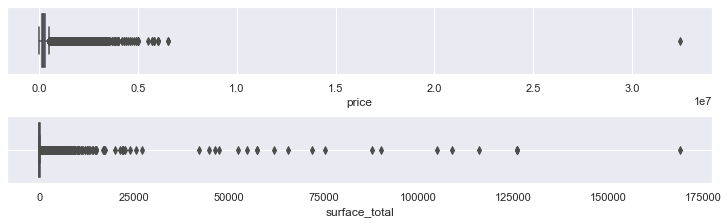

In [369]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,3),constrained_layout= True)
sns.boxplot(data=data2,x="surface_total", ax=ax2)
sns.boxplot(data=data2,x="price", ax=ax1)
plt.grid()
plt.show()

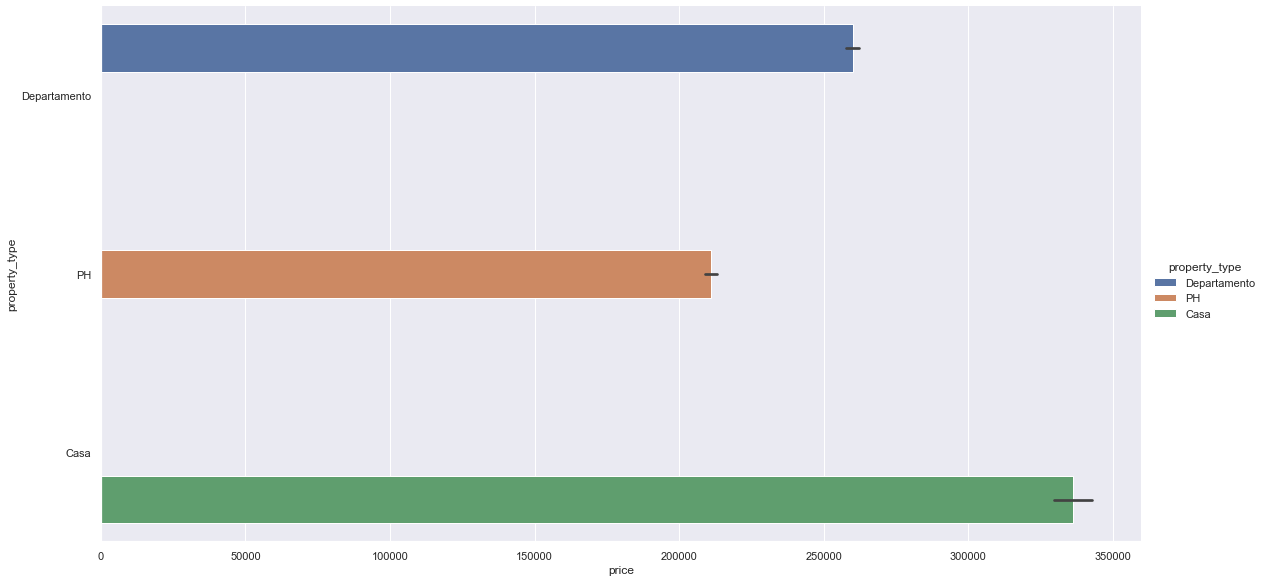

In [370]:
sns.catplot(x='price', y="property_type",hue='property_type', data=data2, kind = "bar",height=8,aspect=2,legend=True)


### Como podemos observar en  las visualizaciones las variables tienen una cantidad considerable de  valores atípicos en base a estas   definimos que para este análisis vamos a trabajar  con propiedades de un valor de  hasta 450000

In [371]:
data2 = data2[((data2['price'] <= 4500000))]

In [372]:
data3=data2.copy()

In [373]:
data3.shape

(102800, 9)

# Detecion de outliers 


In [374]:
#definimos los cuantiles
Q1= data3.quantile(0.25)
Q3= data3.quantile(0.75)
IQR = Q3-Q1
#aplicamos a todas las columnas del data
data3=data3[~((data3<(Q1-1.5*IQR))|(data3>(Q3+1.5*IQR))).any(axis=1)]
data3.shape

<ipython-input-374-ba0328c431ca>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data3=data3[~((data3<(Q1-1.5*IQR))|(data3>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-374-ba0328c431ca>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data3=data3[~((data3<(Q1-1.5*IQR))|(data3>(Q3+1.5*IQR))).any(axis=1)]


(86546, 9)

In [375]:
data3.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,2038.098567,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,3528.966163,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,3528.966163,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,2425.057930,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,Capital Federal,2425.057930,2.0,1.0,1.0,70.0,70.0,159500.0,PH


# Ahora codificamos la variable property_type para asi poder alimentar nuestro algoritmo con esta 

In [376]:
dummies = pd.get_dummies(data3, columns=["property_type"])
dummies.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,Capital Federal,2038.098567,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,Capital Federal,3528.966163,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,Capital Federal,3528.966163,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,Capital Federal,2425.057930,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
6,Capital Federal,2425.057930,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1


In [377]:
dummies.shape
type(dummies)

pandas.core.frame.DataFrame

### -Realizamos un mapa de calor para  visualizar valores faltantes 

<AxesSubplot:>

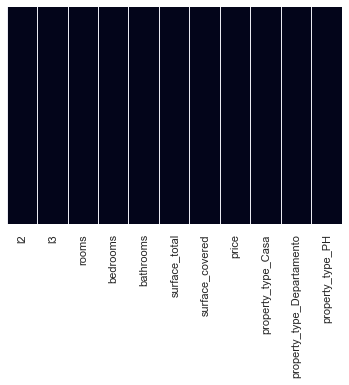

In [378]:
sns.heatmap(dummies.isnull(), yticklabels=False, cbar=False)


In [379]:
dummies2=dummies.copy()

In [380]:
dummies2.shape

(86546, 11)

### - Ahora definimos X e y para los modelos  

In [541]:
X = dummies2[["rooms","surface_covered","surface_total","bedrooms","bathrooms","property_type_Casa","property_type_Departamento","property_type_PH",'l3']] #Observa que sólo usamos 3 features del dataset
y = dummies2['price']

dummies2.shape


(86546, 11)

# Escalado de datos

### - Vamos ahora a escalar la X para igualar la escala de la variable y 

In [429]:
escalador = StandardScaler()
escalador.fit(X)

StandardScaler()

In [430]:
X_escalado = escalador.transform(X)
X_escalado

array([[-0.75280246, -0.28156628, -0.18688262, ..., -2.51707173,
         2.82813303, -0.82530823],
       [-0.75280246, -0.71718304, -0.83249438, ..., -2.51707173,
         2.82813303,  1.53656544],
       [-0.75280246, -0.54963813,  0.20048443, ..., -2.51707173,
         2.82813303,  1.53656544],
       ...,
       [-1.75228152, -1.05227286, -0.70337202, ...,  0.39728705,
        -0.35359016, -2.06975773],
       [-0.75280246, -0.95174591, -1.01326567, ...,  0.39728705,
        -0.35359016, -2.06975773],
       [ 0.2466766 ,  0.28808641, -0.05776027, ...,  0.39728705,
        -0.35359016, -2.06975773]])

## Train test split 


In [431]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_escalado, y,test_size=0.20,random_state=42)

### - Construimos un DecisionTreeRegressor con nuestro nuevo dataset transformado 

In [432]:
decision_tree= DecisionTreeRegressor(max_depth=25,random_state=42)
decision_tree.fit(X_train, y_train)

y_arbol_train_pred = decision_tree.predict(X_train)
y_arbol_test_pred= decision_tree.predict(X_test)

In [433]:

MAE_train=mean_absolute_error(y_train,y_arbol_train_pred)
MAE_test=mean_absolute_error(y_test,y_arbol_test_pred)
RMSE_train=np.sqrt(mean_squared_error(y_train,y_arbol_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_arbol_test_pred))
r2_train= metrics.r2_score(y_train, y_arbol_train_pred)
r2_test= metrics.r2_score(y_test, y_arbol_test_pred)

In [434]:
print("El Error absoluto medio train:",MAE_train)
print("El Error absoluto medio test:",MAE_test)
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

El Error absoluto medio train: 6836.760309778518
El Error absoluto medio test: 20499.615873618593
*******************************************
Error cudratico medio train: 15403.818874981154
Error cudratico medio test: 38569.789390635764
*******************************************
El Coeficiente de determinacion train: 0.9723648729602253
El Coeficiente de determinacion test: 0.8262746715376029
*******************************************


### Metricas del anterior arbol de desicion 

#### El Error absoluto medio train: 23681.8678332786
#### El Error absoluto medio test: 49388.884628718595
*******************************************
#### Error cudratico medio train: 54047.89650654257
#### Error cudratico medio test: 141864.7831195434
*******************************************
#### El Coeficiente de determinacion train: 0.9671459367517681
#### El Coeficiente de determinacion test: 0.7793119430612151

# - En comparación con el primer  vemos una mejora sustancial en este respecto al MAE al RMSE y al R2 teniendo una mejora en el MAE del 141.5% en el RMSE de 367% y una mejora de 4.6% en el r2 con respecto al ejercicio de ML  pasado,  de estos inferimos que varios de los factores que aumentaron el rendimiento del modelo son la codificación de variables categóricas a numéricas la eliminación de valores atípicos y por último el escalado de la variables predictoras contra la variable a predecir.

# Modelos avanzados 


## -Como primer modelo escogimos un random forest  pero antes de crear este vamos a hacer cross validation de los datos 


In [435]:
from sklearn.ensemble import RandomForestRegressor

In [436]:
clf = RandomForestRegressor(n_estimators=100,max_depth=20, n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForest = clf

In [437]:
clf_scores = cross_val_score(clf, X, y, cv=5)

In [438]:
print(clf_scores)
# print(tree_scores.mean(), knn_scores.mean())
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (clf_scores.mean(), clf_scores.std() * 2))

[0.87135561 0.87291881 0.86365531 0.861023   0.88882103]
Accuracy para Tree: 0.87 (+/- 0.02)


In [439]:
clf_scores = cross_validate(clf, X, y, cv=5,n_jobs = -1)


In [440]:
clf_scores

{'fit_time': array([52.03264666, 51.77666473, 50.05281734, 50.54078436, 26.82509661]),
 'score_time': array([1.1999197 , 0.83994126, 0.80794501, 0.75195026, 0.45597172]),
 'test_score': array([0.87135561, 0.87291881, 0.86365531, 0.861023  , 0.88882103])}

In [497]:
clf.feature_importances_

array([0.04047372, 0.34934997, 0.27060794, 0.01905266, 0.0994175 ,
       0.00198187, 0.01349396, 0.00583441, 0.19978797])

### - Ya con los scores de la validación cruzada nos podemos dar una idea del posible rendimiento de este modelo cuando apliquemos las métricas de evaluación

In [441]:
X_train,X_test,y_train,y_test= train_test_split(X_escalado, y,test_size=0.20,random_state=42)

## - Para las metricas de evalucacion hemos escogido el error cuadratico medio y el r2  

In [442]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


In [443]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)



In [444]:
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

Error cudratico medio train: 19273.84073138634
Error cudratico medio test: 32000.88238105769
*******************************************
El Coeficiente de determinacion train: 0.9567345534536826
El Coeficiente de determinacion test: 0.8804106476910138
*******************************************


In [489]:
clf.oob_score_

0.8801927165525183

### - Optimizacion de parametros a travez del random search 

In [ ]:
param_dist ={'n_estimators':[10,50,100,500,1000],"max_features":[2,3,4,5],}

ada_clf = RandomizedSearchCV(RandomForestRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

ada_clf.fit(X_train, y_train)



In [ ]:
ada_clf.best_params_

In [445]:
clf = RandomForestRegressor(n_estimators=500,max_depth=20,max_features=4, n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestRegressor(max_features=4, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=42)

In [483]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [484]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)


In [485]:
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

Error cudratico medio train: 17989.523752263627
Error cudratico medio test: 27546.962423443074
*******************************************
El Coeficiente de determinacion train: 0.962272898904486
El Coeficiente de determinacion test: 0.9116569648989772
*******************************************


In [449]:
clf.feature_importances_

array([0.04047372, 0.34934997, 0.27060794, 0.01905266, 0.0994175 ,
       0.00198187, 0.01349396, 0.00583441, 0.19978797])

## Ahora vamos a construir un Adaboost 

In [450]:
from sklearn.ensemble import AdaBoostRegressor

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.30, random_state=42)

In [452]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor())
# Entrenamos el modelo
ada_clf.fit(X_train, y_train)
#get_params().keys()

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [453]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [454]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [455]:
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 19126.37043300667
Error cudratico medio test: 33772.72634473375
*******************************************
El Coeficiente de determinacion train: 0.9573539090191729
El Coeficiente de determinacion test: 0.8672125213839322
*******************************************


In [ ]:

param_dist = {
 'n_estimators': [50, 100,250,500,1000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

ada_clf = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

ada_clf.fit(X_train, y_train)

In [ ]:
ada_clf.best_params_

In [486]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=500,loss='exponential',learning_rate=0.01)


In [487]:
ada_clf.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.01,
                  loss='exponential', n_estimators=500)

In [458]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [459]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [460]:
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 15854.733293334231
Error cudratico medio test: 33620.78112837686
*******************************************
El Coeficiente de determinacion train: 0.9706956572657939
El Coeficiente de determinacion test: 0.8684046688337242
*******************************************


# Vamos ahora a graficar los aciertos del modelo versus su error para ver donde se concentra este

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 15414.160239472953
Raíz del error cuadrático medio en Test: 32712.89441122456
--------------------------
R2 o coeficiente de determinacion train : 0.9723016535968194
R2 o coeficiente de determinacion test: 0.8754158405983229
--------------------------


C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


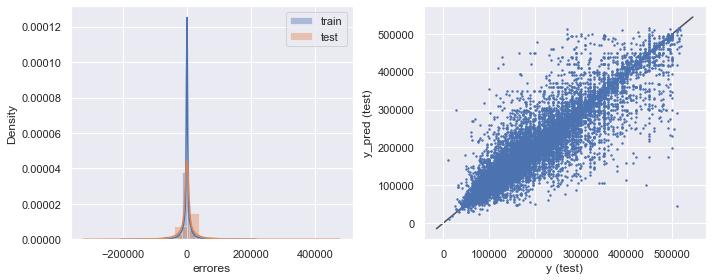

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 17989.523752263627
Raíz del error cuadrático medio en Test: 27546.962423443074
--------------------------
R2 o coeficiente de determinacion train : 0.962272898904486
R2 o coeficiente de determinacion test: 0.9116569648989772
--------------------------


C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


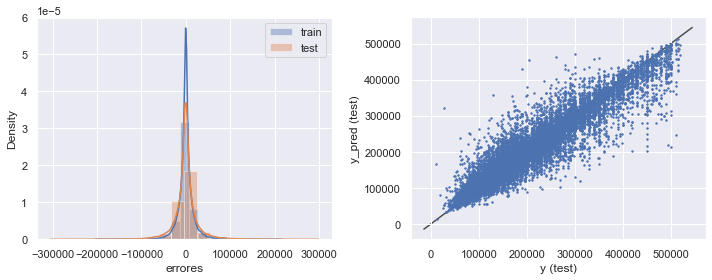

Modelo: ADA Boost
Raíz del error cuadrático medio en Train: 15854.733293334231
Raíz del error cuadrático medio en Test: 33620.78112837686
--------------------------
R2 o coeficiente de determinacion train : 0.9706956572657939
R2 o coeficiente de determinacion test: 0.8684046688337242
--------------------------


C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cankil\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


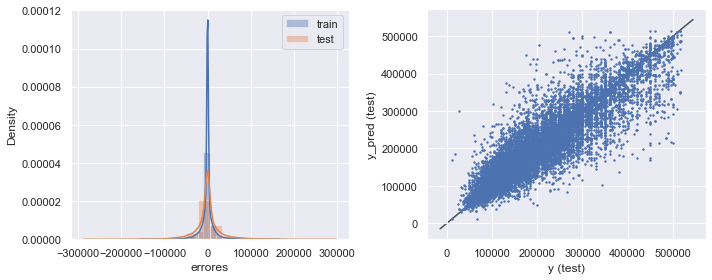

In [461]:
modelos = ['Árbol de Decisión', 'Random Forest', 'ADA Boost']

for i, model in enumerate([decision_tree, clf, ada_clf]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print("--------------------------")
    
    
    
    print(f'R2 o coeficiente de determinacion train : {r2_train}')
    print(f'R2 o coeficiente de determinacion test: {r2_test}')
    print("--------------------------")
    
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# En donde fallan los modelos?

## - Como observamos en la gráfica del error de cada modelo, la distribución de estos obedece a una distribución normal ya que la mayoría de los errores están concentrados en el centro de la misma por otro lado el  ADAboost y el árbol de decisión el  error  se centra en la áreas con una densidad de cercana a 0 para y para el random forest en las áreas entre 0 y 3.5 de densidad esto en consecuencia de la gran concentración de puntos sobre la línea


## - Después de haber optimizado y evaluado los modelos construidos hasta ahora escogería el Random Forest siendo este el que mayor rendimiento ha mostrado en las métricas de evaluación tendiendo un RMSE para train de 17989 y para test de 27546 así como un R2 de 0.96 en train y 0.91 en test mostrando poca varianza y desempeño sobresaliente frente a los otros 2 donde alcanzaron valores similares para el RMSE en train a este modelo pero aun así el random forest ostenta el RMSE  más bajo, además el ada boost y el árbol no alcanzaron el R2 del RF por lo que para este caso sería el modelo más robusto a utilizar

# Realizamos un mapa de correlacion 

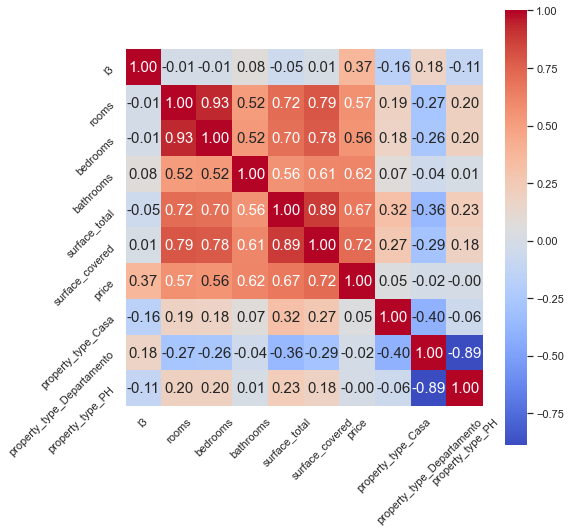

In [462]:
corr = dummies2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## ¿ Que variables fueron relevantes para el modelo para hacer al una prediccion?

## -  Ya que el modelo más robusto para este ejercicio fue el modelo de random forest vamos    a centrar el análisis sobre este por lo que primero identificamos las variables que más          influencia tuvieron en la predicción, siendo estas las variables relativas al tamaño de la        propiedad como surface_covered y surface_total teniendo 34.9%  de importancia y 27%        en un tercer lugar la variable l3 que usamos para tener el promedio del valor del metro cuadrado por barrios y de ahí para en adelante todas las variables con menos de 10% de influencia sobre el resultado del modelo.

In [542]:
importancias=pd.DataFrame({'col_name': clf.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)

importancias 

,col_name
surface_covered,0.349350
surface_total,0.270608
l3,0.199788
bathrooms,0.099418
rooms,0.040474
bedrooms,0.019053
property_type_Departamento,0.013494
property_type_PH,0.005834
property_type_Casa,0.001982


<AxesSubplot:title={'center':'Feature_Importances'}>

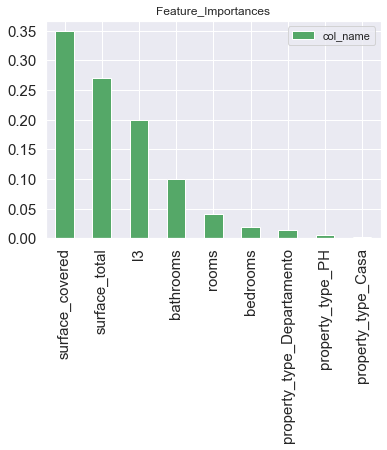

In [550]:
importancias.plot.bar(fontsize= 15, width=0.5,color='g',title='Feature_Importances')

# Ahora vamos a traer unos cuantos arboles del random forest para comparar entre estos vamos a usar el estimador 10 , 30 , 50 y 80.

In [505]:
clf_tree = clf.estimators_[10]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 669991378,
 'splitter': 'best'}

In [506]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 28438.879858351036
Error cudratico medio test: 37978.547206959716
*******************************************
El Coeficiente de determinacion train: 0.9057157660979713
El Coeficiente de determinacion test: 0.8320803277728006
*******************************************


In [507]:
clf_tree = clf.estimators_[30]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 787716372,
 'splitter': 'best'}

In [508]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 28568.809131376303
Error cudratico medio test: 37811.21988806691
*******************************************
El Coeficiente de determinacion train: 0.904852281594884
El Coeficiente de determinacion test: 0.8335567218944411
*******************************************


In [509]:
clf_tree = clf.estimators_[50]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1224821422,
 'splitter': 'best'}

In [510]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 28419.075216563906
Error cudratico medio test: 38168.931955503846
*******************************************
El Coeficiente de determinacion train: 0.9058470381672254
El Coeficiente de determinacion test: 0.8303925604740159
*******************************************


In [511]:
clf_tree = clf.estimators_[80]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 524150214,
 'splitter': 'best'}

In [512]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 28567.203171886948
Error cudratico medio test: 38487.65890777957
*******************************************
El Coeficiente de determinacion train: 0.9048629785116322
El Coeficiente de determinacion test: 0.8275481440769622
*******************************************


## -Comparando el rendimiento de estos árboles podemos ver la fortaleza de los algoritmos         de baggin, ya que de por si los árboles no tienen un rendimiento que supere el 82% sin             embargo cuando estos se combinan el rendimiento del modelo en general mejora mas              del 10%.
## -Revisando estos árboles al azar podemos inferir que según los parámetros fijados lo que         cambia en estos es el random state el cual controla la aleatoriedad de estos. 
## -Con relación a los resultados esperados para este dataset puedo afirmar que el                         comportamiento de este fue como se esperaba ya que en el anterior ejercicio nos dieron         los filtros para el preprocesamiento sin embargo para este no hubo parámetros                         específicos de como filtrar aun así la cantidad de filas y columnas dadas la vez anterior           sirvieron de guía para llegar a un dataset lo mas limpio posible además de que esta vez           ya teníamos más herramientas en la caja para poder codificar variables numéricas o                 agregar  dummys dependiendo del caso


# -Concluisiones sobre este ejercicio de machine learning



## - Una de las conclusiones de este proceso es que las variables así no tengan una                        correlación lineal con la variable a predecir pueden igual tener importancia a la hora de            las predicciones esto fue comprobado a través de prueba y error corriendo los modelos          con variables dummys y sin variables dummys y cuando se hizo la prueba sin las                      dummys el r2 disminuyo en un 10%y RMSE aumento.
## - El correcto preprocesamiento es una de las tareas más importantes para el correcto                desempeño de los modelos
## - Siempre se busca llegar a un modelo en el punto medio de bias y varianza ya que                      cuando se tiene mucho de uno es necesario aplicar transformación a los datos ya sea              para complejizarlos o simplificarlos dependiendo del caso 
## - Los modelos pueden ser más o menos sensible a la optimización de parámetros ya que          para este ejercicio el modelo de random forest aumento 3.1% en test después de la                  optimización de parámetros mientras en ADAboost


# Clustering

### - Vamos a ahora a aplicar Kmeans para ver que clusters existen entre rooms y price 

In [645]:
from sklearn.cluster import KMeans
import seaborn as sns


In [646]:
X = data3[["rooms"]] 
y = data3[['price']]

In [647]:
from sklearn.cluster import KMeans


In [648]:
kmeans_1 = KMeans(n_clusters=4, random_state=0)



In [649]:
kmeans_1.fit(X,y)



KMeans(n_clusters=4, random_state=0)

In [650]:
kmeans_1.labels_

array([3, 3, 3, ..., 1, 3, 0])

<AxesSubplot:>

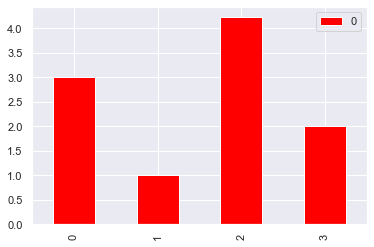

In [654]:
pd.DataFrame(kmeans_1.cluster_centers_).plot(kind='bar',color='red')

## - Finalmenete observamos que entre rooms y price existen 4 clusters definidos por la cantidad de habitaciones de la propiedad y el precio de esta misma